In [1]:
import statsmodels.api as sm 
import numpy as np
import scipy.stats as spstats
import matplotlib.pyplot as plt
import matplotlib as mpl


%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

# Portfolio Management: Efficient Frontier
import quandl as qdl


In [3]:
# qdlKey= 'iz3gpGtYiTWsRDWdgpaD'

pgToken=  'WIKI/PG'
aaplToken= 'WIKI/AAPL'
msftToken= 'WIKI/MSFT'
jpmToken=   'WIKI/JPM'
cscoToken= 'WIKI/CSCO'
tsoToken= 'WIKI/TSO'
bbyToken= 'WIKI/BBY'

# gldToken=  'WIKI/GLD'

startdate= '2010-01-01'
enddate=   '2018-01-01'


Data= qdl.get([pgToken, aaplToken, msftToken, jpmToken, cscoToken, tsoToken, bbyToken],
              start_date= startdate, 
                 end_date= enddate, 
              #authtoken= qdlKey
             )


In [4]:
Data

,WIKI/PG - Open,WIKI/PG - High,WIKI/PG - Low,WIKI/PG - Close,WIKI/PG - Volume,WIKI/PG - Ex-Dividend,WIKI/PG - Split Ratio,WIKI/PG - Adj. Open,WIKI/PG - Adj. High,WIKI/PG - Adj. Low,...,WIKI/BBY - Low,WIKI/BBY - Close,WIKI/BBY - Volume,WIKI/BBY - Ex-Dividend,WIKI/BBY - Split Ratio,WIKI/BBY - Adj. Open,WIKI/BBY - Adj. High,WIKI/BBY - Adj. Low,WIKI/BBY - Adj. Close,WIKI/BBY - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,61.11,61.3100,60.6300,61.12,9190800.0,0.00,1.0,47.466464,47.621811,47.093629,...,39.6300,40.19,6433800.0,0.0,1.0,32.164174,32.761601,31.994634,32.446741,6433800.0
2010-01-05,61.13,61.2800,60.6000,61.14,8649400.0,0.00,1.0,47.481998,47.598509,47.070327,...,40.5000,41.21,6979200.0,0.0,1.0,32.729308,33.504348,32.697014,33.270221,6979200.0
2010-01-06,60.94,60.9600,60.5000,60.85,9908400.0,0.00,1.0,47.334418,47.349953,46.992653,...,40.6600,40.89,4192500.0,0.0,1.0,33.270221,33.375175,32.826188,33.011874,4192500.0
2010-01-07,60.58,60.7000,60.2400,60.52,8972800.0,0.00,1.0,47.054792,47.148001,46.790702,...,40.7000,41.54,8762000.0,0.0,1.0,32.939214,33.577008,32.858481,33.536641,8762000.0
2010-01-08,60.36,60.5300,60.0600,60.44,8464600.0,0.00,1.0,46.883910,47.015956,46.650889,...,39.7500,39.91,14177900.0,0.0,1.0,32.810041,32.987654,32.091514,32.220687,14177900.0
2010-01-11,60.08,60.2700,59.0100,60.20,14774600.0,0.00,1.0,46.666423,46.814004,45.835314,...,39.0000,39.23,9568900.0,0.0,1.0,32.325641,32.325641,31.486014,31.671700,9568900.0
2010-01-12,60.70,61.3600,60.5000,60.89,13460700.0,0.00,1.0,47.148001,47.660648,46.992653,...,38.7100,39.26,6770900.0,0.0,1.0,31.566747,31.752434,31.251887,31.695920,6770900.0
2010-01-13,61.04,61.7900,60.9100,61.52,16968100.0,0.00,1.0,47.412092,47.994646,47.311116,...,39.3100,39.73,4400000.0,0.0,1.0,31.784727,32.172247,31.736287,32.075367,4400000.0
2010-01-14,61.42,61.7400,61.3800,61.58,9139500.0,0.00,1.0,47.707252,47.955809,47.676183,...,39.2400,39.35,4046500.0,0.0,1.0,31.736287,32.083441,31.679774,31.768581,4046500.0


In [21]:
indx= np.logical_and(Data.index>= startdate,  Data.index< enddate) 
mktData= Data.ix[indx]
mktData.tail()
mktData.head()
a= [10, 22, 34, 46, 58, 70, 82 ]
print(mktData.columns[a])

mktData= mktData.ix[:, a]
mktData

Index(['WIKI/PG - Adj. Close', 'WIKI/AAPL - Adj. Close',
       'WIKI/MSFT - Adj. Close', 'WIKI/JPM - Adj. Close',
       'WIKI/CSCO - Adj. Close', 'WIKI/TSO - Adj. Close',
       'WIKI/BBY - Adj. Close'],
      dtype='object')


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,WIKI/PG - Adj. Close,WIKI/AAPL - Adj. Close,WIKI/MSFT - Adj. Close,WIKI/JPM - Adj. Close,WIKI/CSCO - Adj. Close,WIKI/TSO - Adj. Close,WIKI/BBY - Adj. Close
Date,,,,,,,
2010-01-04,47.474231,27.503268,25.153472,35.571510,20.403200,13.399867,32.446741
2010-01-05,47.489766,27.550818,25.161599,36.260526,20.312299,13.390819,33.270221
2010-01-06,47.264512,27.112585,25.007183,36.459760,20.180079,13.617015,33.011874
2010-01-07,47.008188,27.062465,24.748741,37.181982,20.270980,13.508441,33.536641
2010-01-08,46.946049,27.242385,24.917785,37.090666,20.378409,13.354628,32.220687
2010-01-11,46.759632,27.002063,24.600827,36.966145,20.320562,13.028905,31.671700
2010-01-12,47.295581,26.694915,24.438284,36.102799,19.998276,12.775565,31.695920
2010-01-13,47.784926,27.071461,24.665844,36.733706,20.361881,12.277934,32.075367
2010-01-14,47.831531,26.914674,25.161599,37.098968,20.618057,12.377460,31.768581


In [22]:
mktData.columns= ['PG', 'AAPL', 'MSFT',  'JPM', 'CSCO', 'TSO', 'BBY']
for colName in mktData.columns:
    ts= mktData[colName]
    mktData[colName+'_ret']= np.log( ts/ts.shift(1) )
mktData= mktData.dropna(axis=0, how='any')
mktData

,PG,AAPL,MSFT,JPM,CSCO,TSO,BBY,PG_ret,AAPL_ret,MSFT_ret,JPM_ret,CSCO_ret,TSO_ret,BBY_ret
Date,,,,,,,,,,,,,,
2010-01-05,47.489766,27.550818,25.161599,36.260526,20.312299,13.390819,33.270221,0.000327,0.001727,0.000323,0.019185,-0.004465,-0.000675,0.025063
2010-01-06,47.264512,27.112585,25.007183,36.459760,20.180079,13.617015,33.011874,-0.004754,-0.016034,-0.006156,0.005479,-0.006531,0.016751,-0.007795
2010-01-07,47.008188,27.062465,24.748741,37.181982,20.270980,13.508441,33.536641,-0.005438,-0.001850,-0.010389,0.019615,0.004494,-0.008005,0.015771
2010-01-08,46.946049,27.242385,24.917785,37.090666,20.378409,13.354628,32.220687,-0.001323,0.006626,0.006807,-0.002459,0.005286,-0.011452,-0.040030
2010-01-11,46.759632,27.002063,24.600827,36.966145,20.320562,13.028905,31.671700,-0.003979,-0.008861,-0.012802,-0.003363,-0.002843,-0.024693,-0.017185
2010-01-12,47.295581,26.694915,24.438284,36.102799,19.998276,12.775565,31.695920,0.011397,-0.011440,-0.006629,-0.023632,-0.015987,-0.019636,0.000764
2010-01-13,47.784926,27.071461,24.665844,36.733706,20.361881,12.277934,32.075367,0.010293,0.014007,0.009269,0.017324,0.018019,-0.039731,0.011900
2010-01-14,47.831531,26.914674,25.161599,37.098968,20.618057,12.377460,31.768581,0.000975,-0.005808,0.019900,0.009894,0.012503,0.008073,-0.009611
2010-01-15,47.241210,26.464875,25.080328,36.260526,20.163551,12.458891,31.429500,-0.012418,-0.016853,-0.003235,-0.022859,-0.022291,0.006557,-0.010731


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


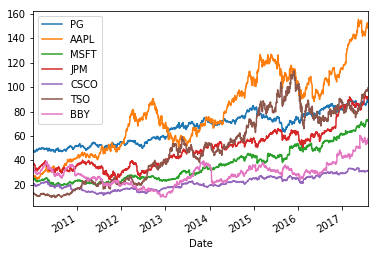

In [23]:
mktData.ix[:, 0:7].plot()

In [24]:
retData= mktData.ix[:, 7:]
Omega= retData.cov()*252
# Omega= np.array(Omega)
Omega

,PG_ret,AAPL_ret,MSFT_ret,JPM_ret,CSCO_ret,TSO_ret,BBY_ret
PG_ret,0.019705,0.009933,0.012554,0.014394,0.012353,0.013172,0.009553
AAPL_ret,0.009933,0.065609,0.022858,0.024077,0.023378,0.031394,0.024327
MSFT_ret,0.012554,0.022858,0.050838,0.028182,0.027183,0.030138,0.018762
JPM_ret,0.014394,0.024077,0.028182,0.070352,0.031355,0.043705,0.032935
CSCO_ret,0.012353,0.023378,0.027183,0.031355,0.065410,0.027881,0.024105
TSO_ret,0.013172,0.031394,0.030138,0.043705,0.027881,0.147065,0.033096
BBY_ret,0.009553,0.024327,0.018762,0.032935,0.024105,0.033096,0.165732


In [25]:
mu= np.array(retData.mean()*252)
mu

array([ 0.08477395,  0.22272583,  0.13899129,  0.12458742,  0.05606833,
        0.26511753,  0.07678688])

In [28]:
N= 100000
ret= np.ones(N)
sigma= np.ones(N)

for i in range(N):
    w= np.random.random(7); 
    w=w.T
    w= w/(w.sum())
    ret[i]= np.dot(w, mu)
    sigma[i]=np.sqrt( np.dot(np.dot(w, Omega), w))



Text(0.5,1,'Portf Metrics (PG, AAPL, MSFT, JPM, CSCO, TSO, BBY) Sharpe=1.00650021165')

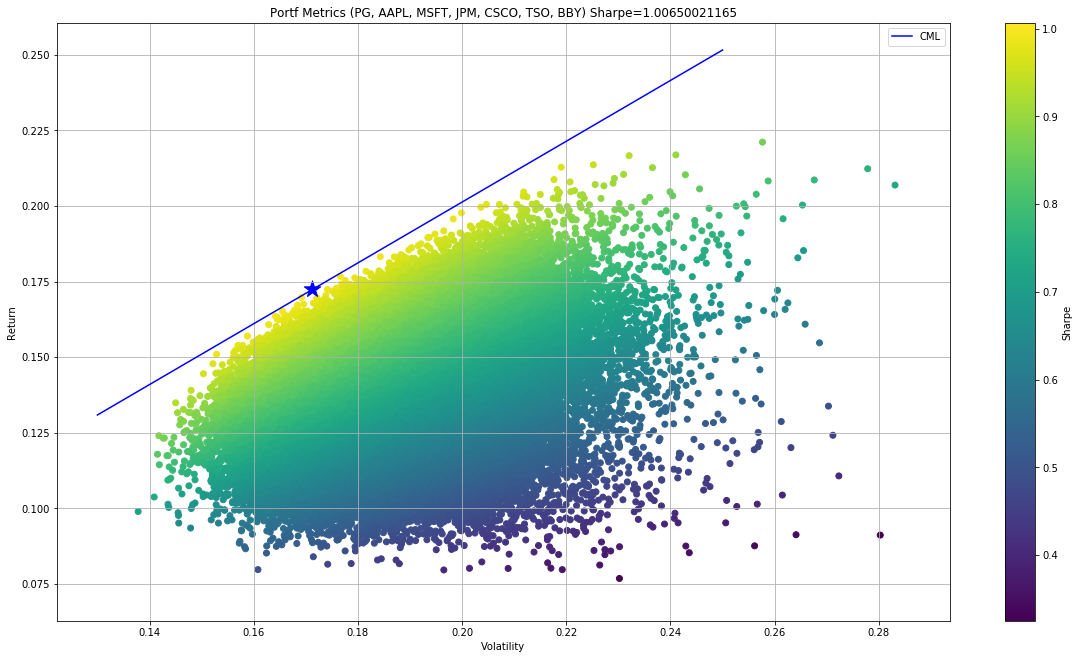

In [31]:
plt.figure(figsize=(20, 11))
plt.scatter(sigma, ret, c= ret/sigma, marker= 'o')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label= 'Sharpe')
indx=np.argmax(ret/sigma)
plt.scatter(sigma[indx], ret[indx], marker= '*',c='b',  s= 300 )
x= np.linspace(0.13, 0.25, 100)
plt.plot(x, ret[indx]/sigma[indx]* x, 'b', label='CML' )
plt.legend()
plt.title('Portf Metrics (PG, AAPL, MSFT, JPM, CSCO, TSO, BBY) Sharpe='+ str(ret[indx]/sigma[indx]) )




In [12]:
## Note:
# Above plot is typical. Usually when we include more market conditions, the Markovitz frontier may not be very good.
# Just try to include 2008 or 2016. 
# Also note, AAPL has stock split in Jun 2014. Adjust the price if one would like to include this change. 

In [32]:
# Portfolio optimization
# we optimize the sharpe ratio
def negat_SR( w, mu, Omega) :
    ret= np.dot(w, mu)
    sigma= np.sqrt( np.dot( w, np.dot( w.T, Omega )))
    
    return -ret/sigma


In [33]:
import scipy.optimize as spo
constr= {'type': 'eq', 'fun': lambda x: np.sum(x)-1 }
bounds= (0,None), (0, None), (0,None), (0,None), (0, None), (0,None), (0,None)
mktPortf= spo.minimize(negat_SR, (1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7), args=(mu, Omega),
                       method='SLSQP', constraints= constr, bounds= bounds)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


In [34]:
w=mktPortf.x
mktPortfRet= np.dot(w, mu)
mktPortfSigma= np.sqrt(np.dot(w.T, np.dot( Omega, w)))

In [35]:
mktPortfRet

0.1745539705149364

In [36]:
mktPortfSigma

0.17015161562276152

In [37]:
mktPortfSharpe= mktPortfRet/mktPortfSigma

In [38]:
mktPortfSharpe

1.0258731301261061

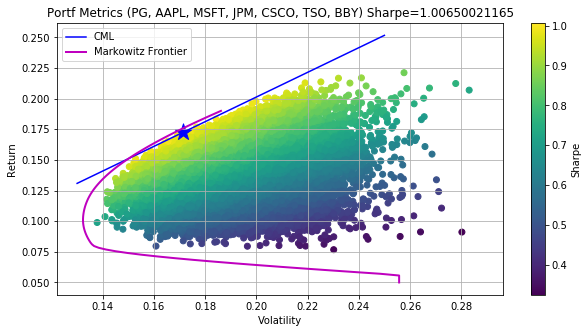

In [43]:
# construct the frontier
import scipy.optimize as spo
r= np.linspace(0.05,0.19, 100)
sig= np.ones(100)
for i in range(100):
    constra= ({'type': 'eq', 'fun': lambda x:  np.dot(x, mu)- r[i]},
              {'type': 'eq', 'fun': lambda x:  np.sum(x)-1})
    bounds=   ( (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1) )
    
    opt= spo.minimize( negat_SR, (1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7), method='SLSQP',
                        args= (mu, Omega), constraints= constra, bounds= bounds)
    w= opt.x
    sig[i]= np.sqrt( np.dot( w, np.dot(Omega, w)))
    
plt.figure(figsize=(10, 5))
plt.scatter(sigma, ret, c= ret/sigma, marker= 'o')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label= 'Sharpe')
indx=np.argmax(ret/sigma)
plt.scatter(sigma[indx], ret[indx], marker= '*',c='b',  s= 300 )
x= np.linspace(0.13, 0.25, 100)
plt.plot(x, ret[indx]/sigma[indx]* x, 'b', label='CML' )

plt.title('Portf Metrics (PG, AAPL, MSFT, JPM, CSCO, TSO, BBY) Sharpe='+ str(ret[indx]/sigma[indx]) )
plt.plot(sig, r, 'm', linewidth=2, label= 'Markowitz Frontier')
plt.legend()
